In [1]:
import pandas as pd
data_sh=pd.read_csv("C:/Users/MYCOM/data/2023년 문화관광 데이터 분석대회(카드데이터_내국인).txt",sep='|')
data_sh.head()

C:\Users\MYCOM\AppData\Local\Temp\ipykernel_11224\3613778591.py:2: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  data_sh=pd.read_csv("C:/Users/MYCOM/data/2023년 문화관광 데이터 분석대회(카드데이터_내국인).txt",sep='|')


,자택광역시도,가맹점광역시도,가맹점시군구,GB3,GB2,SEX_CCD,CLN_AGE_R,TA_YM,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC
0,42,42,42830,여행,교통,M,40,202107,RED,활동,18730606,78
1,28,42,42830,여행,관광쇼핑,F,50,202107,RED,활동,319575,26
2,28,43,43111,취미오락,외식,F,60,202107,RED,활동,2187119,96
3,43,43,43111,취미오락,목욕,M,40,202107,RED,활동,1821140,201
4,43,43,43112,여행,관광쇼핑,F,40,202107,WHITE,활동,100688,17


In [2]:
data_sh['GB3'].unique()

array(['여행', '취미오락', '스포츠활동', '문화예술활동'], dtype=object)

In [3]:
data_sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36778848 entries, 0 to 36778847
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   자택광역시도          object
 1   가맹점광역시도         object
 2   가맹점시군구          object
 3   GB3             object
 4   GB2             object
 5   SEX_CCD         object
 6   CLN_AGE_R       int64 
 7   TA_YM           int64 
 8   DAW_CCD_R       object
 9   APV_TS_DL_TM_R  object
 10  VLM             int64 
 11  USEC            int64 
dtypes: int64(4), object(8)
memory usage: 3.3+ GB


In [4]:
data_sh_ph=data_sh[data_sh['가맹점시군구']==47111]

In [5]:
data_sh_ph.head()

,자택광역시도,가맹점광역시도,가맹점시군구,GB3,GB2,SEX_CCD,CLN_AGE_R,TA_YM,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC
65692,36,47,47111,취미오락,외식,F,40,202107,RED,활동,869857,35
66129,42,47,47111,취미오락,종합쇼핑,M,20,202107,WHITE,휴식,1090933,78
66130,11,47,47111,여행,숙박,M,20,202107,WHITE,휴식,2670422,43
66131,30,47,47111,취미오락,미용,F,20,202107,RED,활동,105065,8
66513,41,47,47111,취미오락,외식,M,50,202207,RED,휴식,48818117,872


In [6]:
data_sh_ph=pd.get_dummies(data_sh_ph,columns=['SEX_CCD'])

In [7]:
data_sh_ph.head()

,자택광역시도,가맹점광역시도,가맹점시군구,GB3,GB2,CLN_AGE_R,TA_YM,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC,SEX_CCD_F,SEX_CCD_M
65692,36,47,47111,취미오락,외식,40,202107,RED,활동,869857,35,1,0
66129,42,47,47111,취미오락,종합쇼핑,20,202107,WHITE,휴식,1090933,78,0,1
66130,11,47,47111,여행,숙박,20,202107,WHITE,휴식,2670422,43,0,1
66131,30,47,47111,취미오락,미용,20,202107,RED,활동,105065,8,1,0
66513,41,47,47111,취미오락,외식,50,202207,RED,휴식,48818117,872,0,1


In [8]:
data_reg=data_sh_ph.drop(['자택광역시도','가맹점광역시도','가맹점시군구','DAW_CCD_R','USEC','APV_TS_DL_TM_R','GB2','GB3'],axis=1,inplace=False)

In [9]:
data_reg.head()

,CLN_AGE_R,TA_YM,VLM,SEX_CCD_F,SEX_CCD_M
65692,40,202107,869857,1,0
66129,20,202107,1090933,0,1
66130,20,202107,2670422,0,1
66131,20,202107,105065,1,0
66513,50,202207,48818117,0,1


In [10]:
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117775 entries, 65692 to 36778228
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   CLN_AGE_R  117775 non-null  int64
 1   TA_YM      117775 non-null  int64
 2   VLM        117775 non-null  int64
 3   SEX_CCD_F  117775 non-null  uint8
 4   SEX_CCD_M  117775 non-null  uint8
dtypes: int64(3), uint8(2)
memory usage: 3.8 MB


In [45]:
data_reg.head()

,CLN_AGE_R,TA_YM,VLM,SEX_CCD_F,SEX_CCD_M,MONTH
65692,40,202107,869857,1,0,7.0
66129,20,202107,1090933,0,1,7.0
66130,20,202107,2670422,0,1,7.0
66131,20,202107,105065,1,0,7.0
66513,50,202207,48818117,0,1,0.0


In [50]:
data_reg = data_reg.astype({'TA_YM':'str'})
data_reg['MONTH']=data_reg['TA_YM'].str[4:]

In [52]:
data_reg.drop('TA_YM',axis=1,inplace=True)
data_reg = data_reg.astype({'MONTH':'int'})
data_reg.head()

,CLN_AGE_R,VLM,SEX_CCD_F,SEX_CCD_M,MONTH
65692,40,869857,1,0,7
66129,20,1090933,0,1,7
66130,20,2670422,0,1,7
66131,20,105065,1,0,7
66513,50,48818117,0,1,7


In [53]:
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117775 entries, 65692 to 36778228
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   CLN_AGE_R  117775 non-null  int64
 1   VLM        117775 non-null  int64
 2   SEX_CCD_F  117775 non-null  uint8
 3   SEX_CCD_M  117775 non-null  uint8
 4   MONTH      117775 non-null  int32
dtypes: int32(1), int64(2), uint8(2)
memory usage: 3.4 MB


In [58]:
from sklearn.linear_model import LinearRegression
y_target=data_reg.VLM
X_features=data_reg.drop('VLM',axis=1,inplace=False)
lr=LinearRegression()
lr.fit(X_features,y_target)

LinearRegression()

In [11]:
lr.coef_

NameError: name 'lr' is not defined

In [12]:
import statsmodels.api as sm
results=sm.OLS(y_target,sm.add_constant(X_features)).fit()
results.summary()

NameError: name 'y_target' is not defined

In [65]:
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117775 entries, 65692 to 36778228
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   CLN_AGE_R  117775 non-null  int64
 1   VLM        117775 non-null  int64
 2   SEX_CCD_F  117775 non-null  uint8
 3   SEX_CCD_M  117775 non-null  uint8
 4   MONTH      117775 non-null  int32
dtypes: int32(1), int64(2), uint8(2)
memory usage: 7.4 MB


C:\Users\MYCOM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CLN_AGE_R', ylabel='VLM'>

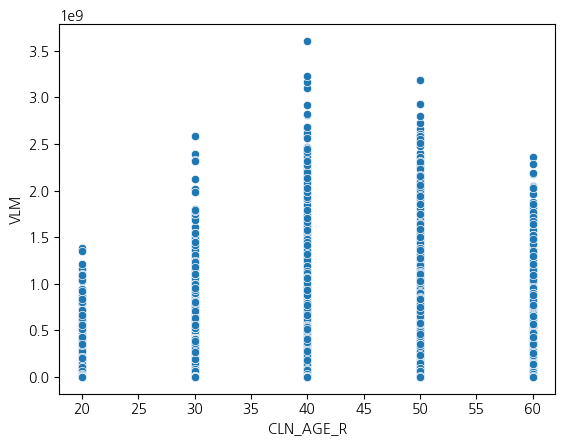

In [13]:
import seaborn as sns
sns.scatterplot(data_reg['CLN_AGE_R'],data_reg['VLM'])

C:\Users\MYCOM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CLN_AGE_R', ylabel='VLM'>

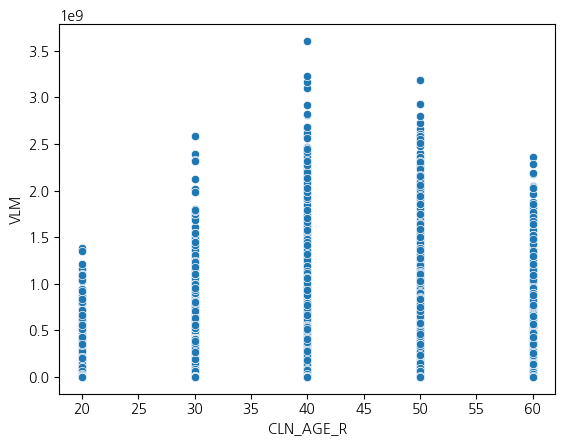

In [14]:
sns.scatterplot(data_sh_ph['CLN_AGE_R'],data_sh_ph['VLM'])

In [68]:
data_sh_ph.head()

,자택광역시도,가맹점광역시도,가맹점시군구,GB3,GB2,CLN_AGE_R,TA_YM,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC,SEX_CCD_F,SEX_CCD_M
65692,36,47,47111,취미오락,외식,40,202107,RED,활동,869857,35,1,0
66129,42,47,47111,취미오락,종합쇼핑,20,202107,WHITE,휴식,1090933,78,0,1
66130,11,47,47111,여행,숙박,20,202107,WHITE,휴식,2670422,43,0,1
66131,30,47,47111,취미오락,미용,20,202107,RED,활동,105065,8,1,0
66513,41,47,47111,취미오락,외식,50,202207,RED,휴식,48818117,872,0,1


In [ ]:
sns.scatterplot(data_reg['SEX'],data_reg['VLM'])

In [56]:
data_reg.VLM

65692         869857
66129        1090933
66130        2670422
66131         105065
66513       48818117
              ...   
36778224     3653114
36778225     4121969
36778226     1580434
36778227     6025404
36778228     1679211
Name: VLM, Length: 117775, dtype: int64

In [57]:
data_reg.drop('VLM',axis=1,inplace=False)

,CLN_AGE_R,SEX_CCD_F,SEX_CCD_M,MONTH
65692,40,1,0,7
66129,20,0,1,7
66130,20,0,1,7
66131,20,1,0,7
66513,50,0,1,7
...,...,...,...,...
36778224,30,1,0,6
36778225,50,0,1,6
36778226,60,0,1,6
36778227,50,1,0,6


In [ ]:
# LDA 수행해서 클러스터링
# 크롤링 -> 주요 키워드 분석 


In [70]:
data_sh_ph.head()

,자택광역시도,가맹점광역시도,가맹점시군구,GB3,GB2,CLN_AGE_R,TA_YM,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC,SEX_CCD_F,SEX_CCD_M
65692,36,47,47111,취미오락,외식,40,202107,RED,활동,869857,35,1,0
66129,42,47,47111,취미오락,종합쇼핑,20,202107,WHITE,휴식,1090933,78,0,1
66130,11,47,47111,여행,숙박,20,202107,WHITE,휴식,2670422,43,0,1
66131,30,47,47111,취미오락,미용,20,202107,RED,활동,105065,8,1,0
66513,41,47,47111,취미오락,외식,50,202207,RED,휴식,48818117,872,0,1


In [71]:
data_sh_ph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117775 entries, 65692 to 36778228
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   자택광역시도          117775 non-null  object
 1   가맹점광역시도         117775 non-null  object
 2   가맹점시군구          117775 non-null  object
 3   GB3             117775 non-null  object
 4   GB2             117775 non-null  object
 5   CLN_AGE_R       117775 non-null  int64 
 6   TA_YM           117775 non-null  int64 
 7   DAW_CCD_R       117775 non-null  object
 8   APV_TS_DL_TM_R  117775 non-null  object
 9   VLM             117775 non-null  int64 
 10  USEC            117775 non-null  int64 
 11  SEX_CCD_F       117775 non-null  uint8 
 12  SEX_CCD_M       117775 non-null  uint8 
dtypes: int64(4), object(7), uint8(2)
memory usage: 15.0+ MB


# 정리

<AxesSubplot:xlabel='연령대', ylabel='지출액'>

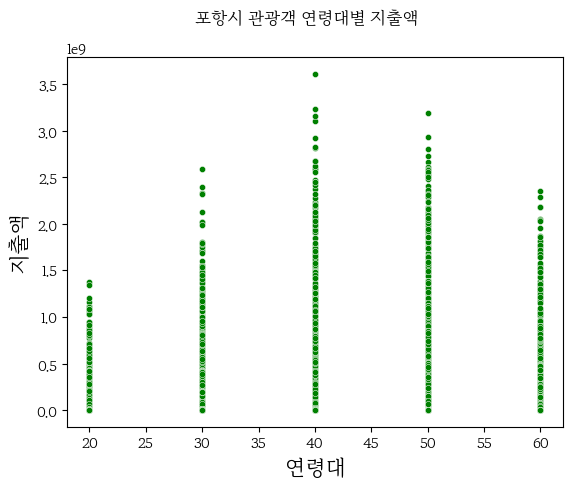

In [34]:
# 신한데이터 사용해서 포항에서 돈을 쓴 사람 슬라이싱
# data_sh_ph=data_sh[data_sh['가맹점시군구']==47111]
# 40-50대 분들이 포항에서 쓴 비용이 높음 -> 4050을 겨냥한 웰니스 상품
import seaborn as sns
import matplotlib.pyplot as plt
plt.xlabel('연령대', fontsize=15)
plt.ylabel('지출액', fontsize=15)
plt.suptitle('포항시 관광객 연령대별 지출액')
sns.scatterplot(data_sh_ph['CLN_AGE_R'],data_sh_ph['VLM'],color='g',s=20)

In [16]:
data_4050=data_sh_ph[(data_sh_ph['CLN_AGE_R']==40)|(data_sh_ph['CLN_AGE_R']==50) ]
data_4050.head()

,자택광역시도,가맹점광역시도,가맹점시군구,GB3,GB2,CLN_AGE_R,TA_YM,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC,SEX_CCD_F,SEX_CCD_M
65692,36,47,47111,취미오락,외식,40,202107,RED,활동,869857,35,1,0
66513,41,47,47111,취미오락,외식,50,202207,RED,휴식,48818117,872,0,1
66850,41,47,47111,취미오락,미용,40,202207,RED,활동,588624,50,1,0
66851,28,47,47111,문화예술활동,공연관람,40,202207,WHITE,휴식,208048,20,0,1
67262,42,47,47111,취미오락,미용,40,202207,RED,활동,324758,10,1,0


In [17]:
# "C:\Users\MYCOM\OneDrive\문서\MaruBuriTTF\MaruBuri-Regular.ttf"
import matplotlib
from matplotlib import rc
import matplotlib.font_manager as fm

#fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location ="C:/Users/MYCOM/OneDrive/문서/MaruBuriTTF/MaruBuri-Regular.ttf"

font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

C:\Users\MYCOM\AppData\Local\Temp\ipykernel_11224\2520382547.py:7: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


(array([12347.,  9376.,  4330.,  6503.,  4581.,  2142.,  3427.,  1088.,
         3760.,   430.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <BarContainer object of 10 artists>)

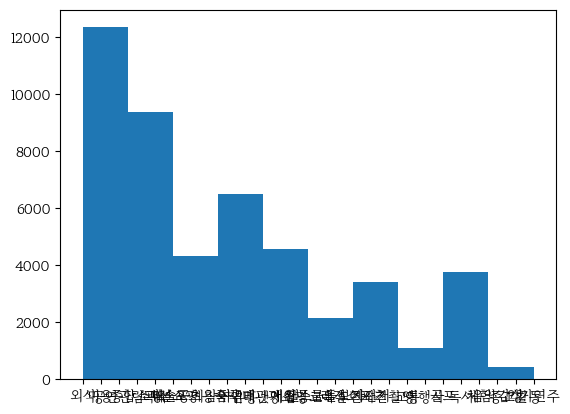

In [18]:
#sns.histplot(data_4050['GB2'])
import matplotlib.pyplot as plt
plt.hist(data_4050['GB2'])

In [20]:
data_4050['GB3'].value_counts()

취미오락      29643
스포츠활동      8243
여행         7263
문화예술활동     2835
Name: GB3, dtype: int64

In [21]:
data_4050['GB2'].value_counts()

외식         7845
종합쇼핑       6987
숙박         4519
미용         3176
목욕         2389
골프         2318
스포츠용품구매    2280
레저스포츠      2077
인터넷게임      2010
유흥         1984
패션쇼핑       1737
공연관람       1326
헬스         1309
관광쇼핑       1262
교육훈련       1107
사진촬영       1091
독서         1048
애완동물돌보기    1035
교통          988
체험          394
종교활동        325
미술공예참여      313
자전거         259
여행사         100
음악감상         57
악기연주         48
Name: GB2, dtype: int64

In [22]:
data_4050[data_4050['GB3']=='여행']['GB2'].value_counts()

숙박      4519
관광쇼핑    1262
교통       988
체험       394
여행사      100
Name: GB2, dtype: int64

In [23]:
import warnings
warnings.filterwarnings("ignore")

(array([4519.,    0., 1262.,    0.,    0.,  988.,    0.,  100.,    0.,
         394.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

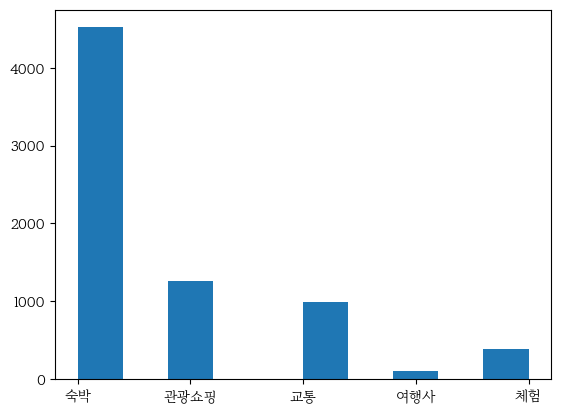

In [24]:
plt.hist(data_4050[data_4050['GB3']=='여행']['GB2'])

In [25]:
data_sh_ph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117775 entries, 65692 to 36778228
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   자택광역시도          117775 non-null  object
 1   가맹점광역시도         117775 non-null  object
 2   가맹점시군구          117775 non-null  object
 3   GB3             117775 non-null  object
 4   GB2             117775 non-null  object
 5   CLN_AGE_R       117775 non-null  int64 
 6   TA_YM           117775 non-null  int64 
 7   DAW_CCD_R       117775 non-null  object
 8   APV_TS_DL_TM_R  117775 non-null  object
 9   VLM             117775 non-null  int64 
 10  USEC            117775 non-null  int64 
 11  SEX_CCD_F       117775 non-null  uint8 
 12  SEX_CCD_M       117775 non-null  uint8 
dtypes: int64(4), object(7), uint8(2)
memory usage: 11.0+ MB


In [26]:
data_sh_ph[(data_sh_ph['CLN_AGE_R']==20) & (data_sh_ph['GB3']=='여행')]['GB2'].value_counts()

숙박      2042
관광쇼핑     504
교통       342
체험       149
여행사        3
Name: GB2, dtype: int64

In [27]:
data_sh_ph[data_sh_ph['CLN_AGE_R']==20]['GB2'].value_counts()

외식         3941
종합쇼핑       3437
인터넷게임      2853
숙박         2042
미용         1932
유흥         1462
공연관람       1406
레저스포츠      1375
사진촬영       1261
스포츠용품구매    1156
패션쇼핑       1098
목욕          998
애완동물돌보기     926
헬스          829
독서          794
골프          532
관광쇼핑        504
교육훈련        475
교통          342
미술공예참여      270
체험          149
자전거         110
종교활동         66
악기연주          6
음악감상          4
여행사           3
Name: GB2, dtype: int64

In [28]:
data_sh_ph[data_sh_ph['CLN_AGE_R']==40]['GB2'].value_counts()

외식         3951
종합쇼핑       3544
숙박         2310
미용         1700
스포츠용품구매    1267
목욕         1197
골프         1157
인터넷게임      1153
레저스포츠      1128
패션쇼핑        953
유흥          950
공연관람        756
헬스          694
교육훈련        691
관광쇼핑        641
사진촬영        603
독서          579
애완동물돌보기     555
교통          517
체험          215
미술공예참여      184
종교활동        138
자전거         133
악기연주         35
여행사          31
음악감상         24
Name: GB2, dtype: int64

In [111]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import quote
query='포항'
url='https://search.naver.com/search.naver?where=view&sm=tab_jum&query='+quote(query)
headers={'User-Agent':'Mozilla/5.0(Windows NT 10.0;Win64;x64)AppleWebkit/537.36(KHTML,like Gecko)Chrome/90.0.4430.93 Safari/537.36'}
res=requests.get(url,headers=headers)

soup=BeautifulSoup(res.text,'lxml')
posts=soup.find_all('li',attrs={'class':'bx_svp_item'})

for post in posts:
    post_title=post.find('a',attrs={'class':'api_txt_lines total_tit'}).get_text()
    print('제목',post_title)

In [113]:
res

<Response [200]>